In [165]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, SCORERS

import xgboost

In [166]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [167]:
sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})

In [168]:
mpl.rcParams['figure.dpi'] = 100

## 1. Importação do dataset de treino

### 1.1 Dataset sobre diabetes mellitus 

In [169]:
df_treino = pd.DataFrame(pd.read_csv("C:/Users/renato.lessa/OneDrive - PRODAM Office 365/03 - Pessoal/02 - PÓS GRADUAÇÃO/09 - Machine Learning Aplicada I/Arquivos/Dados_Treino.csv"))

In [170]:
df_treino.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0

In [171]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117141 entries, 0 to 117140
Columns: 180 entries, encounter_id to diabetes_mellitus
dtypes: float64(157), int64(17), object(6)
memory usage: 160.9+ MB


In [172]:
df_treino.shape

(117141, 180)

In [173]:
df_treino.isnull().sum().sort_values(ascending=False)

h1_bilirubin_min               107832
h1_bilirubin_max               107832
h1_albumin_min                 107055
h1_albumin_max                 107055
h1_lactate_max                 106603
h1_lactate_min                 106603
h1_pao2fio2ratio_min           102033
h1_pao2fio2ratio_max           102033
h1_arterial_ph_min              97042
h1_arterial_ph_max              97042
h1_arterial_pco2_max            96900
h1_arterial_pco2_min            96900
h1_arterial_po2_min             96702
h1_arterial_po2_max             96702
h1_hco3_min                     95635
h1_hco3_max                     95635
h1_wbc_max                      95329
h1_wbc_min                      95329
h1_calcium_max                  95219
h1_calcium_min                  95219
h1_platelets_min                95092
h1_platelets_max                95092
h1_bun_min                      94379
h1_bun_max                      94379
h1_diasbp_invasive_max          94288
h1_diasbp_invasive_min          94288
h1_sysbp_inv

In [174]:
#após análise, decidimos por excluir essas colunas
df_treino = df_treino.drop(columns=['hospital_id', 'elective_surgery', 'hospital_admit_source','icu_admit_source','icu_id','icu_stay_type','icu_type','pre_icu_los_days','readmission_status'])

In [175]:
df_treino.shape

(117141, 171)

In [176]:
df_treino.isnull().sum().sort_values(ascending=False)

h1_bilirubin_max               107832
h1_bilirubin_min               107832
h1_albumin_max                 107055
h1_albumin_min                 107055
h1_lactate_min                 106603
h1_lactate_max                 106603
h1_pao2fio2ratio_min           102033
h1_pao2fio2ratio_max           102033
h1_arterial_ph_min              97042
h1_arterial_ph_max              97042
h1_arterial_pco2_min            96900
h1_arterial_pco2_max            96900
h1_arterial_po2_min             96702
h1_arterial_po2_max             96702
h1_hco3_max                     95635
h1_hco3_min                     95635
h1_wbc_min                      95329
h1_wbc_max                      95329
h1_calcium_min                  95219
h1_calcium_max                  95219
h1_platelets_max                95092
h1_platelets_min                95092
h1_bun_min                      94379
h1_bun_max                      94379
h1_diasbp_invasive_min          94288
h1_diasbp_invasive_max          94288
h1_sysbp_inv

In [177]:
#excluí 59 linhas em branco por conta da coluna gender
df_treino.dropna(subset=['gender'],inplace=True)

In [178]:
df_treino.isnull().sum().sort_values(ascending=False)

h1_bilirubin_max               107778
h1_bilirubin_min               107778
h1_albumin_max                 107001
h1_albumin_min                 107001
h1_lactate_min                 106552
h1_lactate_max                 106552
h1_pao2fio2ratio_min           101980
h1_pao2fio2ratio_max           101980
h1_arterial_ph_min              96991
h1_arterial_ph_max              96991
h1_arterial_pco2_min            96849
h1_arterial_pco2_max            96849
h1_arterial_po2_min             96651
h1_arterial_po2_max             96651
h1_hco3_max                     95583
h1_hco3_min                     95583
h1_wbc_min                      95280
h1_wbc_max                      95280
h1_calcium_min                  95167
h1_calcium_max                  95167
h1_platelets_max                95042
h1_platelets_min                95042
h1_bun_min                      94329
h1_bun_max                      94329
h1_diasbp_invasive_min          94231
h1_diasbp_invasive_max          94231
h1_sysbp_inv

In [179]:
#substituir os dados em branco pela mediana
d1_heartrate_max_mediana = df_treino.d1_heartrate_max.median()
d1_heartrate_min_mediana = df_treino.d1_heartrate_min.median()

print("max",d1_heartrate_max_mediana)
print("min",d1_heartrate_min_mediana)

df_treino.d1_heartrate_max.fillna(d1_heartrate_max_mediana, inplace=True)
df_treino.d1_heartrate_min.fillna(d1_heartrate_min_mediana, inplace=True)

max 101.0
min 69.0


In [180]:
df_treino.isnull().sum().sort_values(ascending=False)

h1_bilirubin_min               107778
h1_bilirubin_max               107778
h1_albumin_max                 107001
h1_albumin_min                 107001
h1_lactate_max                 106552
h1_lactate_min                 106552
h1_pao2fio2ratio_min           101980
h1_pao2fio2ratio_max           101980
h1_arterial_ph_min              96991
h1_arterial_ph_max              96991
h1_arterial_pco2_min            96849
h1_arterial_pco2_max            96849
h1_arterial_po2_min             96651
h1_arterial_po2_max             96651
h1_hco3_max                     95583
h1_hco3_min                     95583
h1_wbc_max                      95280
h1_wbc_min                      95280
h1_calcium_max                  95167
h1_calcium_min                  95167
h1_platelets_min                95042
h1_platelets_max                95042
h1_bun_min                      94329
h1_bun_max                      94329
h1_diasbp_invasive_min          94231
h1_diasbp_invasive_max          94231
h1_sysbp_inv

In [182]:
df_treino.head(10)

,encounter_id,age,bmi,ethnicity,gender,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,68.0,22.732803,Caucasian,M,180.3,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,77.0,27.421875,Caucasian,F,160.0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,NaN,159.0,67.0,159.0,67.0,36.3,35.1,NaN,NaN,61.0,48.0,61.0,48.0,114.0,100.0,NaN,NaN,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,NaN,NaN,95.0,71.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.

In [183]:
df_treino.ethnicity.unique()

array(['Caucasian', nan, 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown'], dtype=object)

In [186]:
#identificar o valor mais frequente de gender
print(df_treino.gender.value_counts())

M    63476
F    53606
Name: gender, dtype: int64


In [185]:
#identificar o valor mais frequente de ethnicity
print(df_treino.ethnicity.value_counts())

Caucasian           90180
African American    12518
Other/Unknown        5630
Hispanic             4544
Asian                1991
Native American       830
Name: ethnicity, dtype: int64


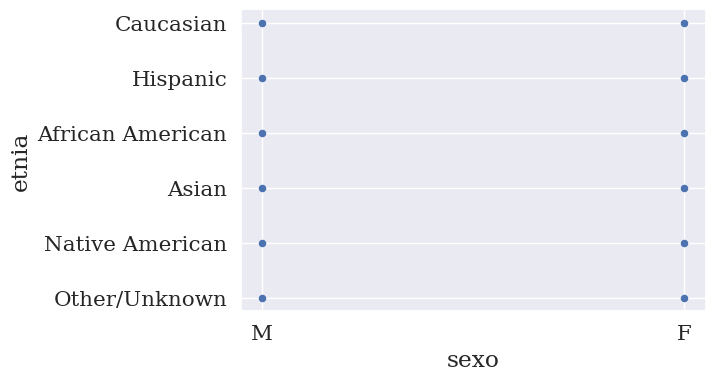

In [189]:
#plt.figure(figsize = (15,8))

ax = sns.scatterplot(data=df_treino, 
                     x='gender', 
                     y='ethnicity')

ax.set_xlabel('sexo')
ax.set_ylabel('etnia')

plt.show()

In [ ]:
analise_qtd_diabetes = pd.DataFrame(dataset_treino['diabetes_mellitus'].value_counts())

In [ ]:
analise_qtd_diabetes

In [ ]:
df_tem_diabetes = dataset_treino

In [ ]:
df_tem_diabetes.head()

In [ ]:
df_tem_diabetes.drop(df_tem_diabetes.loc[(df_tem_diabetes['diabetes_mellitus']==0)].index, inplace=True)

In [ ]:
df_tem_diabetes.head()

In [ ]:
df_tem_diabetes.isnull().sum().sort_values(ascending=False)

In [ ]:
df_tem_diabetes['age'].unique()

In [ ]:
df_tem_diabetes.loc['age']